## Needs emk_neuro_analysis environment

### Loads LFP, camera tracking positions and DIO

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt

from emk_analysis import builder_experiment as bld_exp
from emk_neuro_analysis.lfp import iterator as lfp_iter
from emk_neuro_analysis.position import iterator as pos_iter

## Experiment parameters

In [2]:
# name of experiment
experiment_name = '6082737'

experiment_phase = 'stim'

# data drive
data_disk = 'nvme0'

# directory with the preprocessed/extracted data files
dir_preprocess = f'/media/{data_disk}/Data/{experiment_name}/preprocessing/'

# Location of track config file. 
# This is an excel spreadsheet that specifies the identities of the DIO for your experiment.
fname_config_track = (f'/media/{data_disk}/Data/{experiment_name}/config/Maze_S_Config.xlsx')

# Location of day records. 
# This is an excel spreadsheet that lists details for each session on your experiment day.
dir_records = (f'/media/{data_disk}/Data/{experiment_name}/dayrecords/')

# chose the date - as a list
choose_dates = [ '20220425',]

# choose the epoch - as a list
epoch_list = [1,]

# choose the tetrodes - as a list
tet_list = [28, 27, 20, 19, 18, ]


## Build day records from track confi file and experiment file

In [3]:
data_days = []
for curr_date in choose_dates:

    fname_day_record = f'{dir_records}{curr_date}_{experiment_phase}_training_record.xlsx'
    
    dict_sessions_day = bld_exp.build_day_from_file(experiment_name, 
                                track_config_file=fname_config_track,
                                day_record_file=fname_day_record)
    data_days.append(dict_sessions_day)

dict_sessions_all = bld_exp.build_all_sessions(data_days)
pprint(dict_sessions_all)

{'20220425_01': {'date': '20220425',
                 'description': 'maze stim',
                 'end': Timestamp('2022-04-25 23:55:00'),
                 'experiment': '6082737',
                 'id': 1,
                 'name': 'stim',
                 'start': Timestamp('2022-04-25 01:00:00'),
                 'tasks': {'Track 1': {'animal_id': 'clc',
                                       'description': 'S',
                                       'dio': {'10': {'bit': '_',
                                                      'notes': None,
                                                      'type': 'Unnamed:'},
                                               '11': {'bit': '_',
                                                      'notes': None,
                                                      'type': 'Unnamed:'},
                                               '6': {'bit': '_',
                                                     'notes': None,
                            

## Load LFP data

In [4]:
lfp_data, lfp_timestamp = lfp_iter.iterate_lfp_load(dir_preprocess, 
                                                    tet_list, 
                                                    choose_dates, 
                                                    epoch_list=epoch_list, 
                                                    remove_movement_artifact=True,
                                                    filter_linenoise=False,
                                                    print_debug=False)

/home/jaiyu/.conda/envs/emk_neuro_analysis/lib/python3.6/site-packages/rec_to_binaries/read_binaries.py:73: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(typearr)


Loaded /media/nvme0/Data/6082737/preprocessing/20220425/20220425_6082737_01_stim.LFP tet 28
Loaded /media/nvme0/Data/6082737/preprocessing/20220425/20220425_6082737_01_stim.LFP tet 27
Loaded /media/nvme0/Data/6082737/preprocessing/20220425/20220425_6082737_01_stim.LFP tet 20
Loaded /media/nvme0/Data/6082737/preprocessing/20220425/20220425_6082737_01_stim.LFP tet 19
Loaded /media/nvme0/Data/6082737/preprocessing/20220425/20220425_6082737_01_stim.LFP tet 18
remove movement artifact
remove movement artifact
remove movement artifact
remove movement artifact
remove movement artifact
remove movement artifact
remove movement artifact
remove movement artifact
remove movement artifact
remove movement artifact


## Load position data

In [5]:
# this specifies the zoom factor on the camera
# needs to be measured 
# current setting of L17

cm_pix = {1: 0.3109,
          2: 0.05310,
          3: 0.3109,
          4: 0.05310,
          5: 0.3109,
          6: 0.05310,
          7: 0.3109,
         }


df_pos = pos_iter.iterate_pos_load(dir_preprocess, 
                                   date_list=choose_dates, 
                                   epoch_list=epoch_list, 
                                   cm_pix=cm_pix,
                                   print_debug=False)

1
Loaded /media/nvme0/Data/6082737/preprocessing/20220425/20220425_6082737_01_stim.1.pos


## Plot LFP and speed

<IPython.core.display.Javascript object>


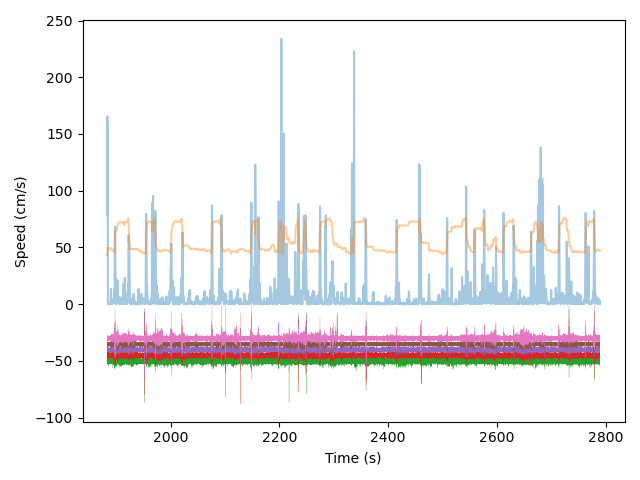

In [6]:
%matplotlib notebook

# sampling rate, convert raw timestamps to seconds on x-axis
fs = 30000

plt.figure()

# speed
plt.plot(df_pos.time/fs, df_pos.dxdydt_cm, zorder=-1, alpha=.4)

# position
plt.plot(df_pos.time/fs, df_pos.xloc_smooth/10, zorder=-1, alpha=.4)

for i, (k, v) in enumerate(lfp_data.items()):
    for e in epoch_list:
        plt.plot(np.array(lfp_timestamp.get(e))/fs, np.array(v.get(e))/1000+5*(i-10), lw=.15)

plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.tight_layout()

In [9]:
max(df_pos.xloc_smooth)-min(df_pos.xloc_smooth)

333.1920471191406

In [10]:
max(df_pos.yloc_smooth)-min(df_pos.yloc_smooth)

132.3118896484375